## PREDICTING HOUSE PRICES USING ADVANCED REGRESSION

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
> “**People who work hard and people who work smart have different measures of success.”**-
*Jacob Morgan*</span>
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
It's all about the smart work we do to make our work easy. People say Mathematicians are usually lazy and find an easy way to solve a hard complex mathematical problem.Let's start doing the Smart Work!!</span>
1. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Data Cleaning, Outlier Analysis and Exploratory Data Analysis</span>
2. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Use Heatmap and Correlation to find the Correlation among features</span>
3. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Analyze all the features and perform log transform for the skewed features</span>
4. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Data Visualization using Seaborn and Plot.ly</span>
5. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Dummifying Categories and Finding Most Important Features</span>
6. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Model building including Lasso and Ridge Regression</span>
7. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Model Validation using plenty of good validators</span>
8. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Conclusion by publishing the research, findings and result
</span>

### ABOUT THE DATASET

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">The dataset is obtained from Kaggle and it is a Competition Dataset which contains **79 features** which influences the price of Homes at Ames, Iowa. The competition organiser also boasts about the advantages of not just estimating house price using number of bedrooms or the fence around the house usually done by the brokers. Yeah, he is right, when you can accurately predict the house price using **Advanced Regression** techniques then why bother about a House Broker's price estimate?</span>

### PROBLEM STATEMENT

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">The problem will be addressed if we build predictive models using Advanced Regression Techniques and validate and pick the best  and train the model using a Test set and validate it using a Train set so it can accurately predict the value of House price which is **SalePrice** in our case.</span>

### CLIENT

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Our Fictional Client is one of the **House Brokerage Firms** in Ames, Iowa looking to determine the exact house price by using our model predictions. Well! its very important to satisfy to the client requirements and hence a model should be built which can predict house prices accurately.</span>

In [68]:
# Importing DataScience libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV, ElasticNetCV, LassoCV,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.grid_search import GridSearchCV

In [2]:
# Reading csv file and making'Id' as Index
df_train = pd.read_csv('train.csv',index_col = 'Id')
df_test = pd.read_csv('test.csv',index_col = 'Id')

In [3]:
# Let's look at the top few rows
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# The rows and columns of our dataset 
df_train.shape

(1460, 80)

In [5]:
# Well we have to deal with plenty of attributes 
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### MISSING DATA


* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Missing data is always a concern, you wonder everytime what happens to the missing values!</span>

* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Whether it was not entered during Data entry? </span> 

* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Whether it got missed during Data Imports/Exports? </span> 

* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Whatever maybe the reason we still can impute them.</span>

* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">First we check for the percentage of missing values in each fields and work each one seperately.</span>

In [6]:
# Checking for the Missing values
# Using isnull fuction to count the total null values in each field
total = df_train.isnull().sum().sort_values(ascending=False) 
# Percent of missing values is estimated by dividing total missing and the original total
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
# Concatenating the Total and Percent fields sing pandas concat fucntion
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Inserting "None" for the missing values for fields 
"PoolQC", "MiscFeature", "Alley", "Fence" and "FireplaceQu" since they are entered as NA which means its not present</span>

In [7]:
# Pandas fillna method to fill missing values with None
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'):
    df_train[col] = df_train[col].fillna('None')

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">For "LotFrontage", the area connected to the house is almost similiar when compared to the neighborhood and hence we fill the median for missing values</span>

In [8]:
#cGroup by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [9]:
# For loop to replace the missing data in the 4 attributes to None 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

In [10]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

In [11]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Filling *0* for Masonary Veener Area because its NA and  Type as *None*</span>

In [12]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Since the default functionality is **Typical** as per the metadata we can impute the missing values to be *Typ* </span>

In [13]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

In [14]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> Double checking for missing values. Well, looks
like we are clean!!</span>

In [15]:
# Well! Things look better now! 
df_train.isnull().sum().max()

0

### OUTLIER ANALYSIS

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Using Scatter plot and performing Bivariate analysis helps in finding outliers in our data. Below clearly there are two data points in GrLivArea which can be eliminated since for a Larger Area the SalePrice is unbelievably less!</span>

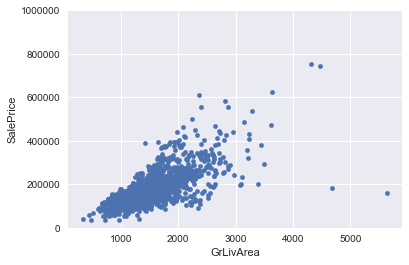

In [16]:
#Scatterplot of Area(sq ft) and SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000));

In [17]:
#Sorted descending to pick the values of GrLivArea for them to drop it
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 5642].index)
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 4676].index)

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">The plot below doesn't have our eliminated values, all 
good so far :) </span>

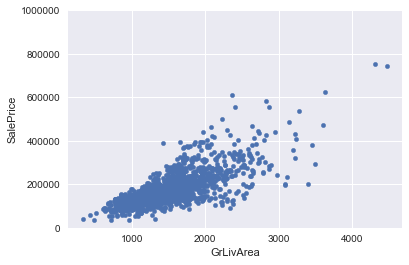

In [18]:
# Rechecking the plot after outlier elimination
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000));

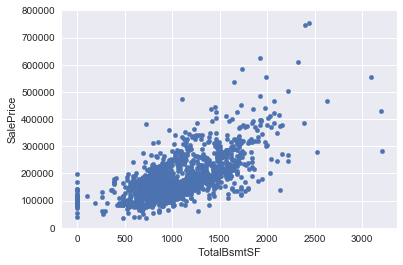

In [19]:
# Total sq feet of Basement area and SalePrice comparison
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">SalesPrice has a strong Correlation with the **OverallQual**,**GarageCars**,**FullBath**,**SalePrice**</span>

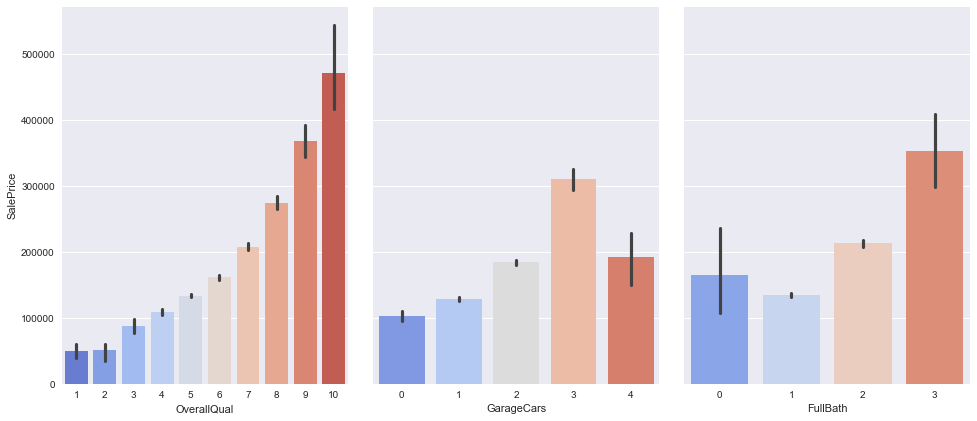

In [20]:
#Let's look at some more variables which affect/influence the Target variable
g = sns.PairGrid(df_train,
                 x_vars=['OverallQual','GarageCars','FullBath'],
                 y_vars=["SalePrice"],
                 aspect=.75, size=6)
#plt.xticks(rotation=90)
g.map(sns.barplot, palette="coolwarm");

### OUR TARGET : SALEPRICE

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Our **Dependent Target Variable SalePrice** is plotted in a Histogram and it doesnt follow normal distribution but positively skewed
and the curve shows most SalePrice lies within \$150000-\$200000</span>

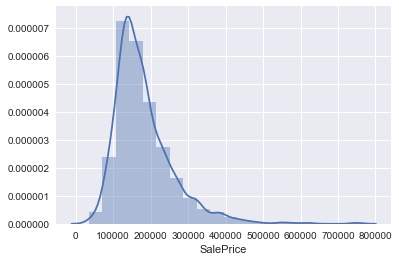

In [21]:
# Using Seaborn to create a distplot with 20 bins
sns.distplot(df_train['SalePrice'],bins = 20);

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Let's address our skewed target and normalize it using numpy log transformation!</span>


 mu = 12.02 and sigma = 0.40



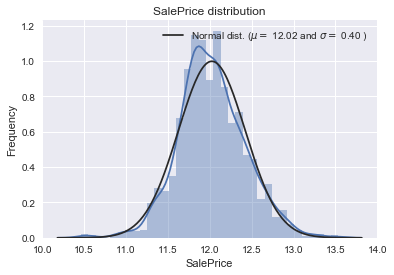

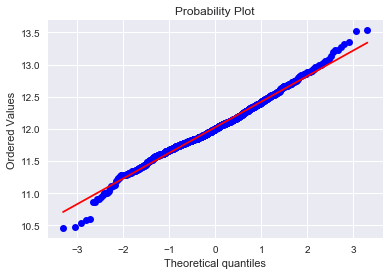

In [22]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">We have fixed the skewness problem now and the Target variable is normally distributed after the Log transformation!</span>

### CORRELATION & HEATMAP

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">A lot is happening with the Correlation heatmap below.Most important features determined by the positive Correlation score and OverallQuality seems to be the leader, obvious though!</span>

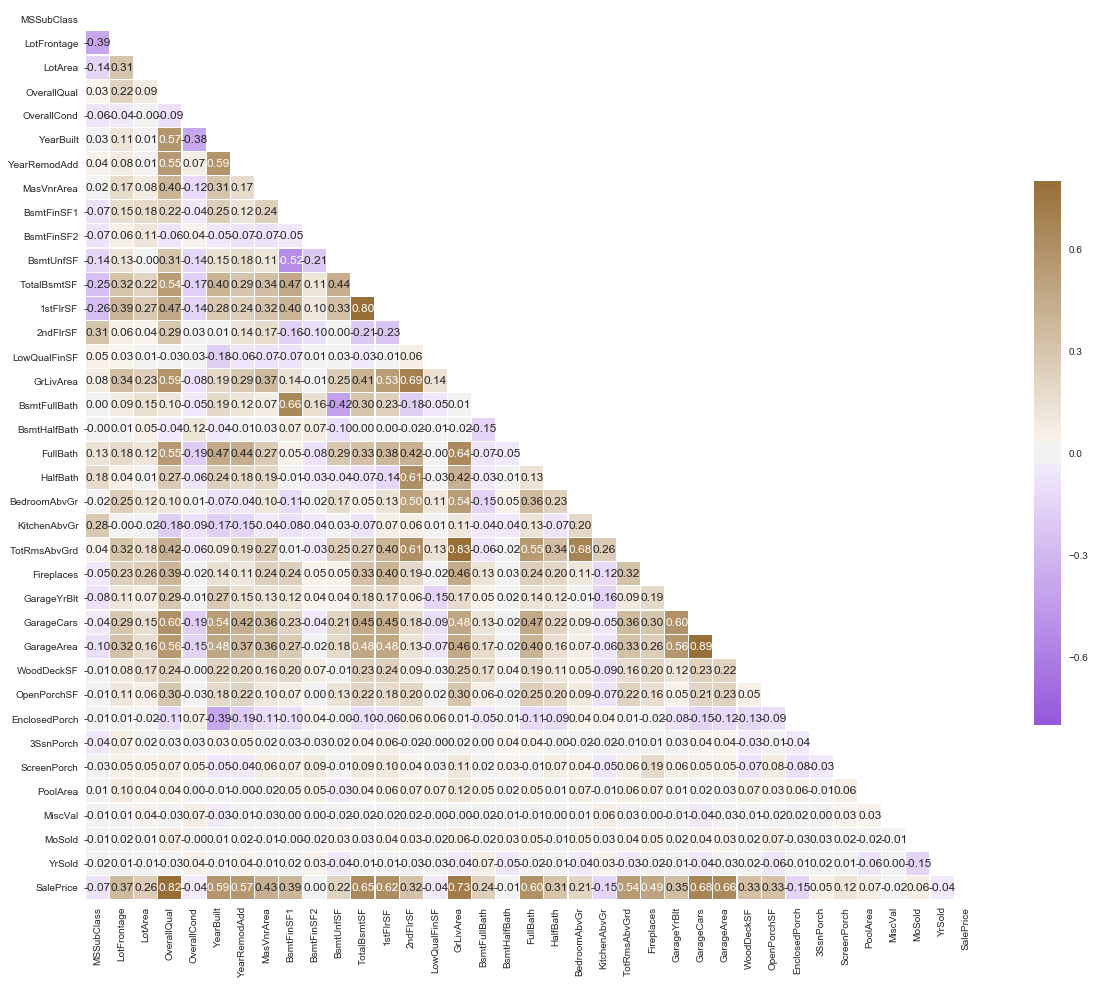

In [23]:
sns.set(style="white")
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(1000, 50, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask,vmax =.8, cmap=cmap, center=0,fmt= '.2f',
            square=True, linewidths=.1, cbar_kws={"shrink": .5});

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">**Pairplot** from Seaborn is a cool visualization to use since it brings all our important features of consideration in a single
plot, below we can see very nice positive correlations between Sales Price, Living Area, TotalBsmtSF and YearBuilt</span>

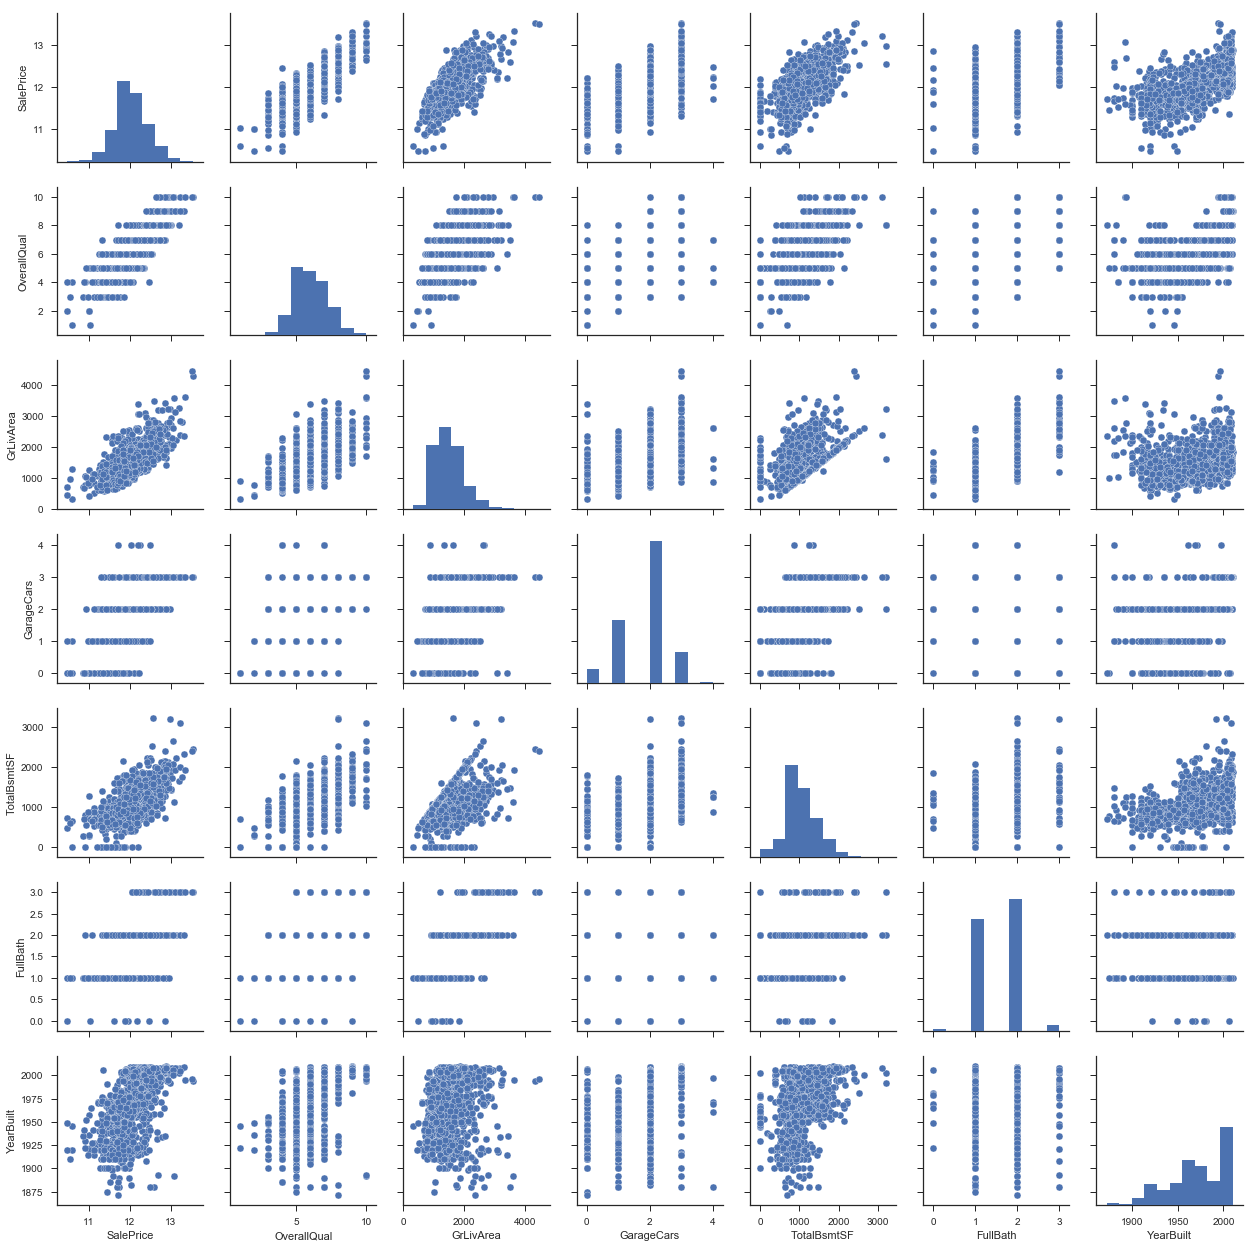

In [24]:
sns.set(style= 'ticks')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

### FEATURE ENGINEERING

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">To get our features right and normally distributed solves most of the problem. Well, skewness is a issue to address here and the numeric features are filtered and applied the log transformation</span>

In [26]:
# Using datatype to seperate numerical features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Computing skewness using lambda function
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna()))
# Filtering highly skewed features
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [27]:
#Log transform to normalize skewed features
df_train[skewed_feats] = np.log1p(df_train[skewed_feats])

**Getting dummies for categorical variables**

In [28]:
df_train = pd.get_dummies(df_train)

In [29]:
df_train.shape

(1458, 302)

In [30]:
#Splitting the Training set into Training and Validation sets
X= df_train.drop(['SalePrice'],axis=1).values

In [31]:
y=df_train['SalePrice'].values

In [32]:
X.shape

(1458, 301)

In [33]:
df_test.shape

(1459, 79)

** Making a Train Validate Split from Train**

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=42)

In [35]:
print('Train size: %i' % X_train.shape[0])
print('Validation size: %i' % X_val.shape[0])

Train size: 1166
Validation size: 292


**Function to return RMSE (Root Mean Squared Error)of our K-Fold Cross Validation**

In [36]:
n_folds = 5
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model,X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**Function to return the *RMSE( Root Mean Squared Error)* using Actual and Predicted values**

In [37]:
def rmse(act, pred):
    return np.sqrt(mean_squared_error(act, pred))

### PREDCITIVE MODELS

**Ridge with CV**

In [38]:
n_folds = 5
custom_cv = KFold(n_folds, shuffle=True, random_state=42)

In [39]:
ridgecv = RidgeCV(alphas=[0.1, 1.0, 10.0],cv =custom_cv)

In [40]:
#fitting our model on the training data
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0],
    cv=KFold(n_splits=5, random_state=42, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [41]:
rmse_cv(ridgecv).mean()

0.11279364184220317

In [71]:
print('Validation R^2: %.5f'  % r2_score(y_val,ridgecv.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,ridgecv.predict(X_val)))
print('Validation Mean Squared Error: %.5f\n'   % mean_absolute_error(y_val,ridgecv.predict(X_val)))

Validation R^2: 0.91508
Validation RMSE: 0.11964

Validation Mean Squared Error: 0.08349



**Kernel Ridge**

In [43]:
KRR = KernelRidge(alpha=0.6)

In [44]:
KRR.fit(X_train,y_train)

KernelRidge(alpha=0.6, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [70]:
print('Validation R^2: %.5f'  % r2_score(y_val,KRR.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,KRR.predict(X_val)))
print('Validation Mean Squared Error: %.5f\n'   % mean_absolute_error(y_val,KRR.predict(X_val)))

Validation R^2: 0.91250
Validation RMSE: 0.12145

Validation Mean Squared Error: 0.08440



In [46]:
rmse_cv(KRR).mean()

0.1162866407992906

**Lasso with CV**

In [47]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005],cv =custom_cv)

In [48]:
lasso.fit(X_train,y_train)

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True,
    cv=KFold(n_splits=5, random_state=42, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [72]:
print('Validation R^2: %.5f'  % r2_score(y_val,lasso.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,lasso.predict(X_val)))
print('Validation Mean Squared Error: %.5f\n'   % mean_absolute_error(y_val,lasso.predict(X_val)))

Validation R^2: 0.92477
Validation RMSE: 0.11261

Validation Mean Squared Error: 0.07891



In [50]:
rmse_cv(lasso).mean()

0.11248187400252989

**Elastic Net with CV**

In [51]:
Elastic = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000
                       ,cv=custom_cv)

In [52]:
Elastic.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=KFold(n_splits=5, random_state=42, shuffle=True), eps=0.001,
       fit_intercept=True, l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99],
       max_iter=5000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [75]:
print('Validation R^2: %.5f'  % r2_score(y_val,Elastic.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,Elastic.predict(X_val)))
print('Validation Mean Squared Error: %.5f\n'   % mean_absolute_error(y_val,Elastic.predict(X_val)))

Validation R^2: 0.92451
Validation RMSE: 0.11281

Validation Mean Squared Error: 0.07922



In [54]:
rmse_cv(Elastic).mean()

0.1125955392791774

**Gradient Boosting Regressor**

In [55]:
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [56]:
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=5,
             subsample=1.0, verbose=0, warm_start=False)

In [57]:
rmse_cv(GBR).mean()

0.11650232036055683

In [78]:
print('Validation R^2: %.5f'  % r2_score(y_val,GBR.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,GBR.predict(X_val)))
print('Validation Mean Squared Error: %.5f\n'   % mean_absolute_error(y_val,GBR.predict(X_val)))

Validation R^2: 0.91113
Validation RMSE: 0.12240

Validation Mean Squared Error: 0.08178



### PIPELINE 

In [58]:
RFPipe = make_pipeline(RobustScaler(),RandomForestRegressor(random_state=42))

In [59]:
RFPipe.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_...estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False))])

In [60]:
rmse_cv(RFPipe).mean()

0.15095840130357938

In [79]:
print('Validation R^2: %.5f'  % r2_score(y_val,RFPipe.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,RFPipe.predict(X_val)))
print('Validation Mean Squared Error: %.5f\n'   % mean_absolute_error(y_val,GBR.predict(X_val)))

Validation R^2: 0.86805
Validation RMSE: 0.14914

Validation Mean Squared Error: 0.08178



**Pipeline with GridSearchCV**

In [81]:
from sklearn.pipeline import Pipeline
GBRPipe = Pipeline([
        ('outlier', RobustScaler()),
        ('gbm', GradientBoostingRegressor(learning_rate = 0.05, max_depth = 4, min_samples_leaf = 15,random_state=5))])

In [82]:
param_grid = {'gbm__learning_rate': [0.01, 0.05],
             'gbm__max_depth': [1,5],
             'gbm__min_samples_leaf': [10, 15]}
             

In [83]:
GBRGrid = GridSearchCV(estimator = GBRPipe,param_grid=param_grid,scoring='neg_mean_absolute_error',n_jobs=-1,cv=5,verbose=1,refit=True,
                       pre_dispatch='2*n_jobs')

In [84]:
GBRGrid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('outlier', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('gbm', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf...          presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gbm__learning_rate': [0.01, 0.05], 'gbm__max_depth': [1, 5], 'gbm__min_samples_leaf': [10, 15]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [86]:
rmse_cv(GBRGrid).mean()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.6s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.6s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.4s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.3s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.7s finished


0.12875198822890499

In [87]:
print('Validation R^2: %.5f'  % r2_score(y_val,GBRGrid.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,GBRGrid.predict(X_val)))
print('Validation Mean Squared Error: %.5f\n'   % mean_absolute_error(y_val,GBRGrid.predict(X_val)))

Validation R^2: 0.89651
Validation RMSE: 0.13208

Validation Mean Squared Error: 0.08968

